In [37]:
#importing packages
import numpy as np
import pandas as pd 
import time 
import re

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')  
nltk.download('punkt')
english_stop_words = stopwords.words('english')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# machine learning

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


from sklearn.metrics import classification_report

import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
total_df=pd.read_csv('dataset_elec_4000.csv', sep=',') #read csv


msk = np.random.rand(len(total_df)) <= 0.8 #reshaping it as training and testing dataset
train_df = total_df[msk] #train
valid_df = total_df[~msk] #test
print(train_df.shape)
print(valid_df.shape)

(3228, 2)
(772, 2)


In [39]:
train_df.sample(5) #random 5 samples

,review,rating
3756,After owning my iPad for almost 3 years and ne...,1.0
976,The micro connector is for my tablet and my an...,1.0
3105,This item was offered as a suggested accessory...,0.0
148,It's really not that quite as i thought it wou...,0.0
3947,"If you love apple, you'll love this. We liked...",1.0


In [40]:
train_df.info() #get info of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3228 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  3228 non-null   object 
 1   rating  3228 non-null   float64
dtypes: float64(1), object(1)
memory usage: 75.7+ KB


In [41]:
train_df['rating'].value_counts() #counting rating of positive and negative

0.0    1629
1.0    1599
Name: rating, dtype: int64

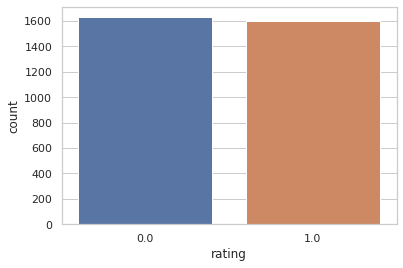

In [42]:
sns.countplot(x=train_df['rating']) #plotting bar plot

In [43]:
train_df.duplicated().sum() #finding duplicate data
train_df= train_df.drop_duplicates() #deleting duplicate datas

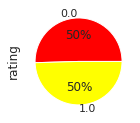

In [44]:
train_df.rating.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(2,2),colors=["red", "yellow"]) #depicting the value of positive and negative value as pie chart in training dataset

In [45]:
# encoder for target feature
from sklearn import preprocessing

In [46]:
train_df['review'].isnull().sum() #finding label with empty value
train_df.dropna(axis=0, inplace=True) #dropping null values

In [47]:
review_train  = train_df["review"] #setting name as review_train
review_valid=valid_df["review"]
target=train_df['rating'] #setting name as taget

In [48]:
#removing spaces
REPLACE_WITH_SPACE = re.compile("(@)") 
SPACE = " "

def preprocess_reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line.lower()) for line in reviews] #making lowercase
    
    return reviews

reviews_train_clean = preprocess_reviews(review_train)
reviews_valid_clean = preprocess_reviews(review_valid)

In [49]:

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words])) #removing stopwords
    return removed_stop_words

no_stop_words_train = remove_stop_words(reviews_train_clean) #removing from training
no_stop_words_valid = remove_stop_words(reviews_valid_clean) # removing from testing

In [50]:

def get_stemmed_text(corpus):
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus] #setting to its main word root

stemmed_reviews_train = get_stemmed_text(no_stop_words_train) #setting root word in train
stemmed_reviews_test = get_stemmed_text(no_stop_words_valid)#setting root word in test

In [51]:
tfidf_vectorizer = TfidfVectorizer() #vectorizing text to number
tfidf_vectorizer.fit(stemmed_reviews_train) #vectorizing text to number in train
X = tfidf_vectorizer.transform(stemmed_reviews_train) #transforming using TFIDF featrue train 
X_test = tfidf_vectorizer.transform(stemmed_reviews_test) #transforming using TFIDF featrue test

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, target, train_size = 0.75) #splitting the dataset

In [53]:
text_classifier = RandomForestClassifier(n_estimators= 500, random_state=0) #applying random forest decision tree
text_classifier.fit(X_train, y_train) #applying fit function 

y_pred=text_classifier.predict(X_val) # find scores
print(classification_report(y_val,y_pred)) #rint precision, recall, f1

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       425
         1.0       0.80      0.84      0.82       382

    accuracy                           0.83       807
   macro avg       0.83      0.83      0.83       807
weighted avg       0.83      0.83      0.83       807

